In [15]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

This a function that defines EM algorithm. It has several input (parameters): 
1. Iter, which is the number of iterations to be run by the EM algorithm.
2. K, which is the number of clusters or groups we want to find in the data.
3. pdf, which is the function to calculate the probability of data density in a particular cluster, given cluster and data parameters.
4. train, which is the function to update cluster parameters based on data and responsibility weight.
5. Xmat, which is the input data, in the form of a matrix with n data points and d features or dimensions of each data.
6. W_Init, which is the initial weight of each cluster, representing the proportion of the cluster in the mixture.
7. P_Init, which is the initial parameters of each cluster.

And the exp_max function will give output:
1. W, which is the final cluster weights (array 1xK), weight or proportion of each cluster after the EM process is complete.
2. P, which is the final cluster parameter (array dxK), final parameters of each cluster after the iteration is complete.
3. p, which is the responsibility matrix (array Kxn), indicates the probability of each cluster for each data point.

With iterations of Iter, repetitions of E-steps and M-steps are carried out, where in the E-step the probability of each point is calculated based on the parameter values ​​P and W (in the first iteration using P_Init and W_Init). The result is used by the M-step section to calculate new P and W values, which are used for the next iteration.

In [4]:
def exp_max(Iter, K, pdf, train, Xmat, W_Init, P_Init):
    n, D = Xmat.shape
    p = np.zeros((K, n))
    W, P = W_Init, P_Init
    for i in range(0,Iter):
        # E-Step
        for k in range(0,K):
            p[k,:] = W[0,k]*pdf(P[:,k],Xmat)

        # M-Step
        p = (p/sum(p,0))
        W = np.mean(p,1).reshape(1,3)
        for k in range(0,K):
            P[:,k] = train(p[k,:],Xmat)
    return W, P, p

This function calculates new parameters for the cluster (updated cluster mean based on weight p).

In [5]:
def normal_train(p, Xmat):
    m = (Xmat.T @ p.T)/sum(p)
    return m

This function calculates the probability density value of each data pointer in a cluster with parameter m (mean) and covariance matrix c.

In [6]:
def normal_pdf(m, Xmat):
    var = 1
    C = np.zeros((2,2))
    C[0,0] = var
    C[1,1] = var
    mvn = multivariate_normal(m.T, C )
    return mvn.pdf(Xmat)

### Question number 2
Testing the code with example dataset clusterdata.csv. 

In [7]:
Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
W = np.array([[1/3,1/3,1/3]])
M  = np.array([[-2.0,-4,0],[-3,1,-1]])
W_final, P, p = exp_max(100, 3, normal_pdf, normal_train, Xmat, W, M)

In [13]:
print("W: ", W)
print("M: ", M)
print("W_final: ", W_final)
print("P: ", P)
print("p: ", p)

W:  [[0.33333333 0.33333333 0.33333333]]
M:  [[-1.81723463 -3.90018538  0.53430012]
 [-2.94803675 -0.02989837 -1.36506482]]
W_final:  [[0.26703009 0.35791118 0.37505873]]
P:  [[-1.81723463 -3.90018538  0.53430012]
 [-2.94803675 -0.02989837 -1.36506482]]
p:  [[3.33580121e-03 5.53919118e-04 1.83864034e-03 2.60509876e-04
  1.66517560e-03 2.65312447e-04 2.94128187e-02 1.48551357e-04
  2.25352934e-03 7.47768438e-04 9.75565825e-05 5.15868312e-04
  3.60239767e-03 2.99349983e-03 2.64856781e-04 9.32850730e-04
  9.12256894e-04 6.19373494e-03 3.78229163e-05 9.47152462e-04
  6.33476408e-03 1.70246492e-03 1.82031562e-03 1.01379658e-04
  3.42489246e-04 4.35683435e-05 6.94769852e-04 2.52945679e-03
  1.43418836e-04 8.82585181e-04 4.03370919e-04 2.83516841e-04
  7.82573436e-03 2.68438398e-03 6.22212016e-04 1.90929623e-04
  3.00299379e-05 5.10754583e-04 4.73496672e-03 4.34599280e-04
  1.10884274e-04 1.65699800e-03 5.72850176e-05 6.76208616e-03
  1.74592675e-03 4.71595466e-04 1.29149511e-04 2.05898574e-0

First we plot the data points to see the distribution of the points in the 2D plane.

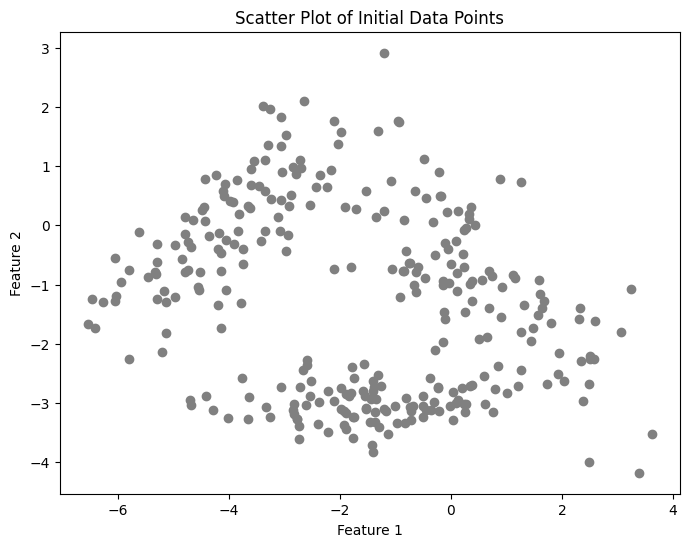

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(Xmat[:,0], Xmat[:,1], c='gray', marker='o')
plt.title('Scatter Plot of Initial Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Then we make the plot again based on the final result after running the EM algorithm. We see the data points divided into three adequate clusters. The plot also shows the placement of the mean for each cluster.

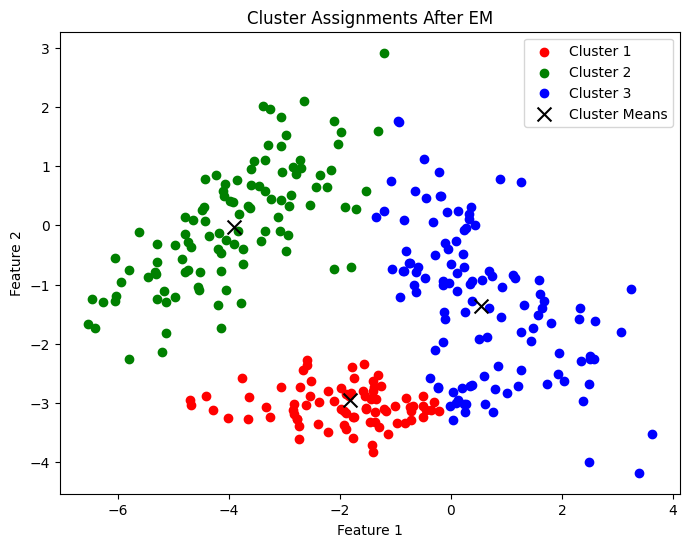

In [ ]:

cluster_assignment = np.argmax(p, axis=0)

plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for k in range(3):
    cluster_points = Xmat[cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')
    
plt.scatter(P[0,:], P[1,:], c='k', marker='x', s=100, label='Cluster Means')

plt.title('Cluster Assignments After EM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Question Number 3
Pada bagian ini, saya membagi datapoints menjadi test dan train dataset, dimana rasio jumlah data point untuk train adalah 70% dari data. Kemudian data points yang ada saya shuffle, dan dibagi ke dalam train_idx (sebanyak train ratio) dan sisanya masuk ke dalam test_idx

Setelah itu, saya set kembali beberapa input awal seperti pada contoh sebelumnya (nilai K, W dan M), lalu kita lakukan algoritma EM untuk mendapatkan nilai W_final, P_final, p_train dari dataset X_train.

Setelah tiap nilai didapat, lalu diujicobakan untuk data X_test dengan menjalankan bagian Estimation saja untuk menentukan di cluster mana tiap datapoint pada dataset tersebut berada. 

Hasilnya seperti terlihat pada plot yang digambar, algoritma berhasil menempatkan posisi tiap data point pada cluster yang benar (adequately clustered), dengan pengecualian beberapa titik yang berbatasan dengan cluster lainnya.


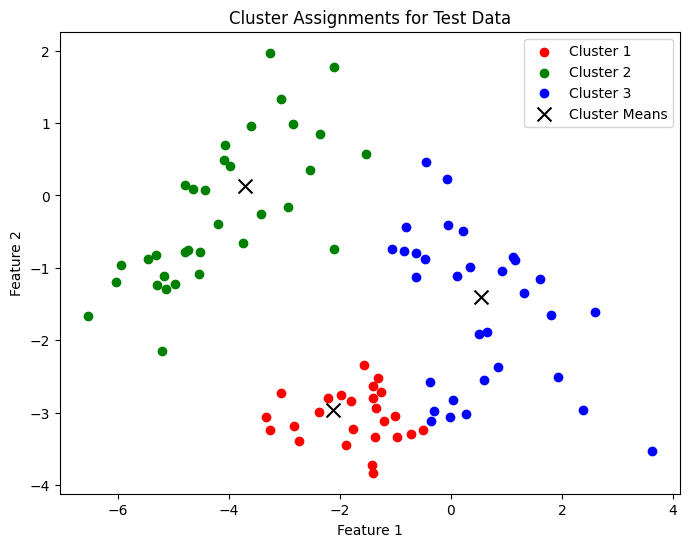

In [22]:
train_ratio = 0.7

np.random.seed(42)  
indices = np.arange(Xmat.shape[0])
np.random.shuffle(indices)

train_size = int(train_ratio * len(indices))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = Xmat[train_idx]
X_test = Xmat[test_idx]

K = 3
W = np.array([[1/3,1/3,1/3]])
M  = np.array([[-2.0,-4,0],[-3,1,-1]])

W_final, P_final, p_train = exp_max(100, K, normal_pdf, normal_train, X_train, W, M)

p_test = np.zeros((K, X_test.shape[0]))
for k in range(K):
    p_test[k,:] = W_final[0,k] * normal_pdf(P_final[:,k], X_test)

p_test = p_test / np.sum(p_test, axis=0)

test_cluster_assignment = np.argmax(p_test, axis=0)

plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = X_test[test_cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(P_final[0,:], P_final[1,:], c='k', marker='x', s=100, label='Cluster Means')

plt.title('Cluster Assignments for Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
